# 7.2  One-versus-All Multi-Class Classification

You can toggle the code on and off in this presentation via the button below.

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Many classification problems have more than two classes: 

- face recognition
- hand gesture recognition
- general object detection
- speech recognition
- ...

Having just two sides, a single linear separator is fundamentally insufficient as a mechanism for differentiating between more than two classes of data.

Here we will see how to overcome this shortcoming when dealing with $C>2$ classes by learning $C$ linear classifiers (one per class), each distinguishing one class from the rest of the data. 

This basic scheme is called **One-versus-All** multi-class classification.

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# import custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import superlearn_library as superlearn
datapath = '../../mlrefined_datasets/superlearn_datasets/'
classif_plotter = superlearn.multi_lin_classification_demo

# standard imports
import matplotlib.pyplot as plt

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## Notation and modeling

A multiclass dataset $\left\{ \left(\mathbf{x}_{p,}\,y_{p}\right)\right\} _{p=1}^{P}$
consists of $C$ distinct classes of data.

Although we can in theory use *any $C$ distinct labels* to distinguish between the classes, it is convenient to use label values $y_{p}\in\left\{ 0,1,...,C-1\right\}$. 

A prototypical toy $C = 3$ class dataset.

<IPython.core.display.Javascript object>


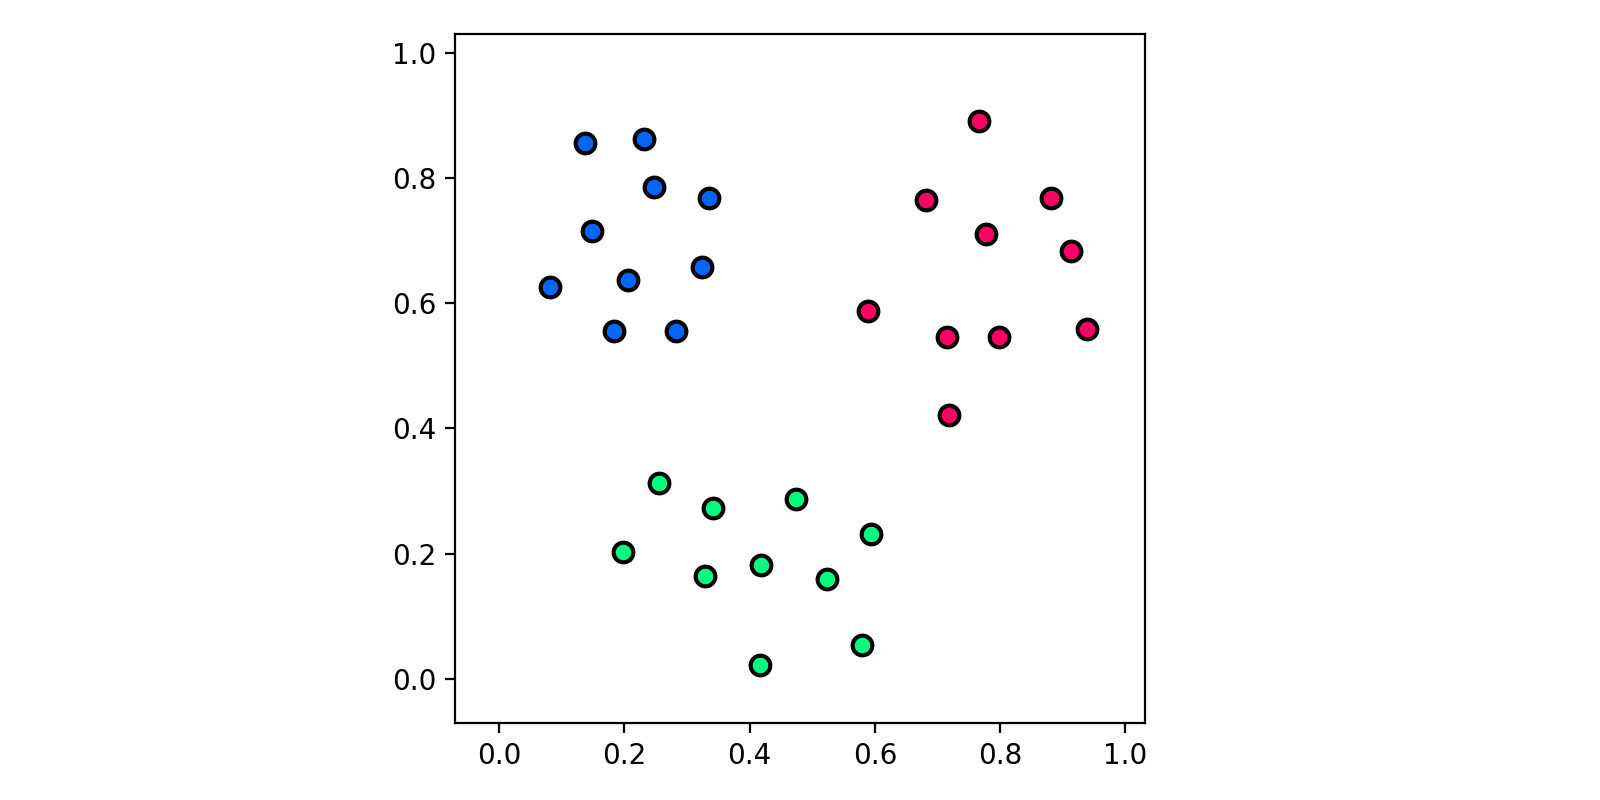

In [7]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
data = np.loadtxt(datapath + '3class_data.csv',delimiter = ',')

# create an instance of the ova demo
demo1 = superlearn.ova_illustrator.Visualizer(data)

# visualize dataset
demo1.show_dataset()

##  Training  $C$ One-versus-All classifiers

**The goal:**

We want to learn how to distinguish each class of our data from the other $C-1$ classes.

**One solution:**

Learn $C$ two-class classifiers on the entire dataset (with the $c^{th}$ classifier trained to distinguish the $c^{th}$ class from the remainder of the data). 

**We need temporary labels:**

With the $c^{th}$ two-class subproblem we simply assign temporary labels $\tilde y_p$ to the entire dataset, giving $+1$ labels to the $c^{th}$ class and $-1$ labels to the remainder of the dataset

\begin{equation}
\tilde y_p = \begin{cases}   +1 \,\,\,\,\,\,\text{if}\,\, y_p = c \\ -1 \,\,\,\,\,\,\text{if}\,\, y_p \neq c    \end{cases}
\end{equation}

Doing this for our $C = 3$ dataset in this case we end up learning 3 linear classifiers - here we use logistic regression for each subproblem, solving each using Newton's method. 

With our classifiers trained we can now illustrate our learned decision boundaries - each learned to distinguish a single class from the remainder of the data. Below we plot two rows of images - in the top row our original dataset is plotted three times with each instance showing just one of the three two-class classifiers learned.  The single class being distinguished is colored with its original color - with the corresponding learned decision boundary colored similarly - and all other data is colored gray. In the bottom row the dataset is shown with along with all three learned decision boundaries all at once.

<IPython.core.display.Javascript object>


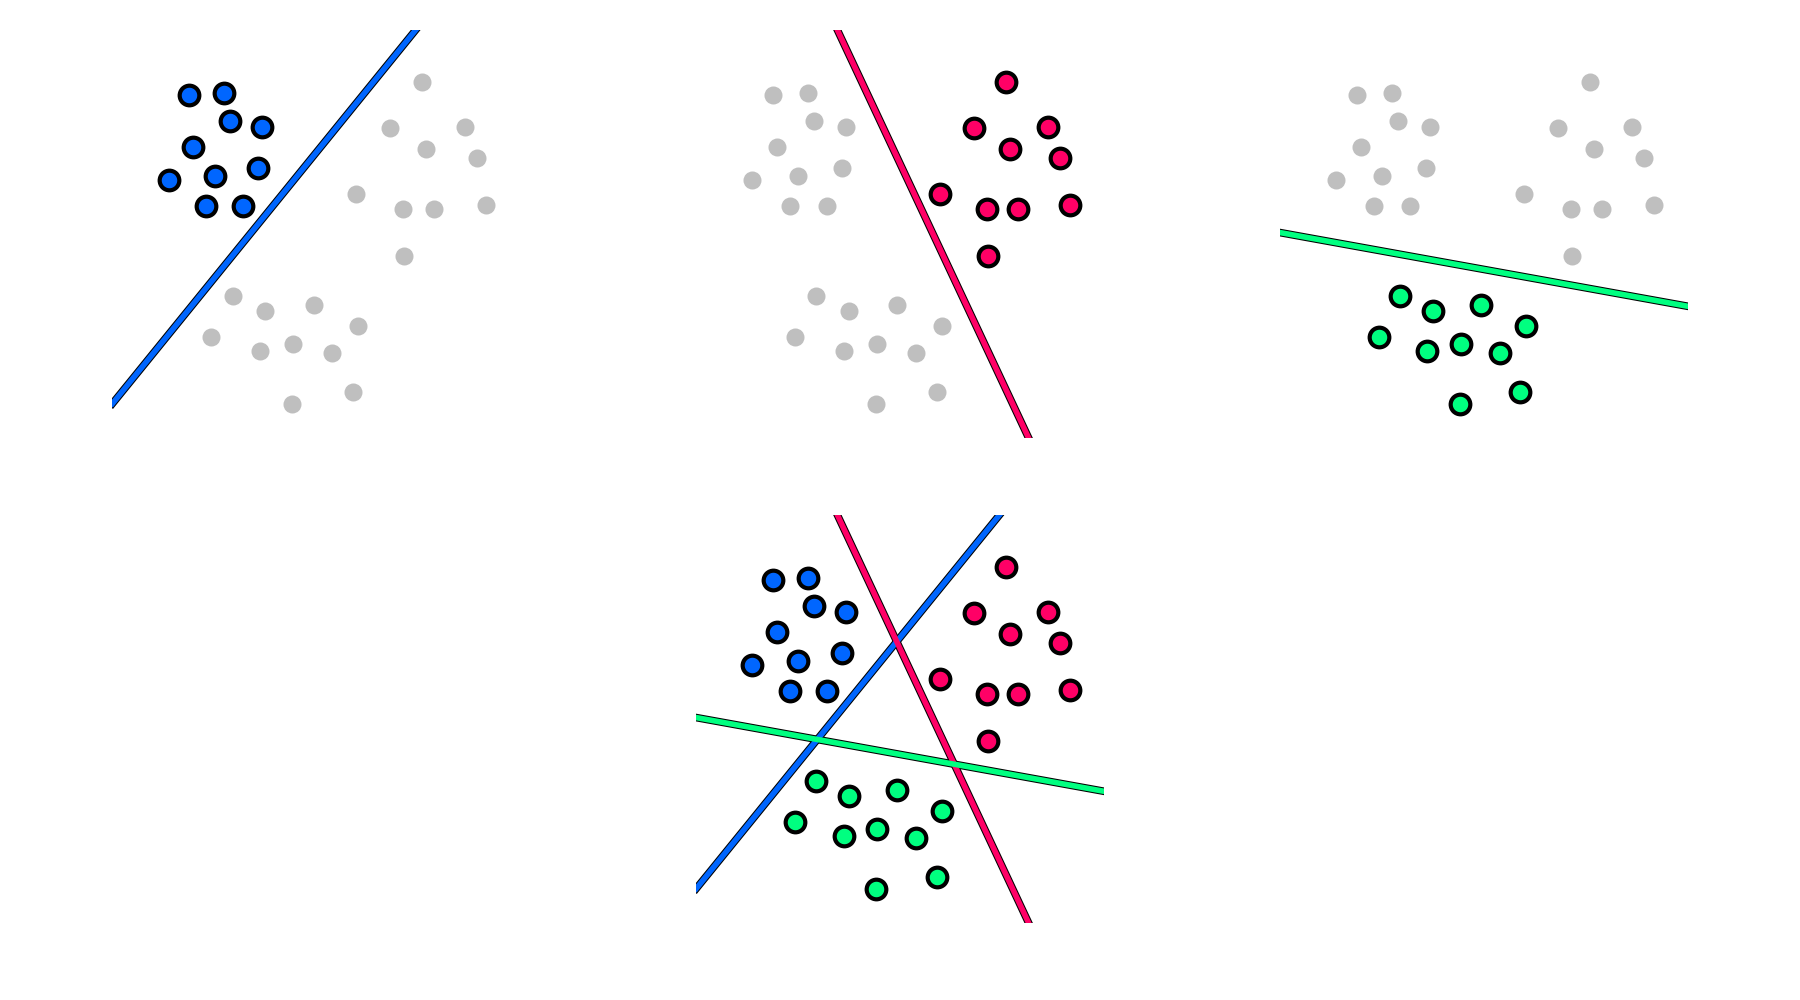

In [8]:
# This code cell will not be shown in the HTML version of this notebook
# solve the 2-class subproblems
demo1.solve_2class_subproblems()

# illustrate dataset with each subproblem and learned decision boundary
demo1.plot_data_and_subproblem_separators()

The three places a point in the space can end up (w.r.t our classifiers):

**1. On the positive side of a single classifier**

**2. On the positive side of more than one classifier**

**3. On the negative side of all classifiers**

## Points on the positive side of a single classifier

Denoting the weights from the $c^{th}$ classifier as $\mathbf{w}_c$


\begin{equation}
\mathbf{w}_c=\begin{bmatrix}
w_{0,c}\\
w_{1,c}\\
w_{2,c}\\
\vdots\\
w_{N,c}
\end{bmatrix}
\end{equation}

then the corresponding decision boundary can be written as 

\begin{equation}
\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c = 0.
\end{equation}

Now note how in the figure above how in each case - because each subproblem is perfectly linearly separable and because of our choice of temporary labels - that the class to be distinguished from the rest lies on the *positive side* of its respective classifier, with the remainder of the points lying on the *negative side*.  This of course means that for the $j^{th}$ classifier we have for the $p^{th}$ point $\mathbf{x}_p$ that

\begin{equation}
\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c  \begin{cases}   > 0 \,\,\,\,\,\,\text{if}\,\,\, y_p = c  \\ < 0 \,\,\,\,\,\, \text{if} \,\,\, y_p \neq c.    \end{cases}
\end{equation}

This implies that - when evaluated by each two-class classifier individually - the one identifying a point's true label always provides the largest evaluation, i.e.,

\begin{equation}
\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_j  = \underset{c \,=\, 0,...,C-1}{\text{max}} \,\,\,\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c 
\end{equation}


So we know how to classify the points that we have, what about those we do not?  How do we classify arbitrary points in the space of our example?  Lets figure this out step-by-step.  

The points that lie solely on the positive side of the $j^{th}$ classifier only should clearly belong to the $j^{th}$ class.

They clearly satisfy the condition 
\begin{equation}
\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_j = \underset{c \,=\, 0,...,C-1}{\text{max}} \,\,\,\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c
\end{equation}

Therefore to get the associated label $y$ for these points, we can write
\begin{equation}
y =  \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c
\end{equation}

<IPython.core.display.Javascript object>


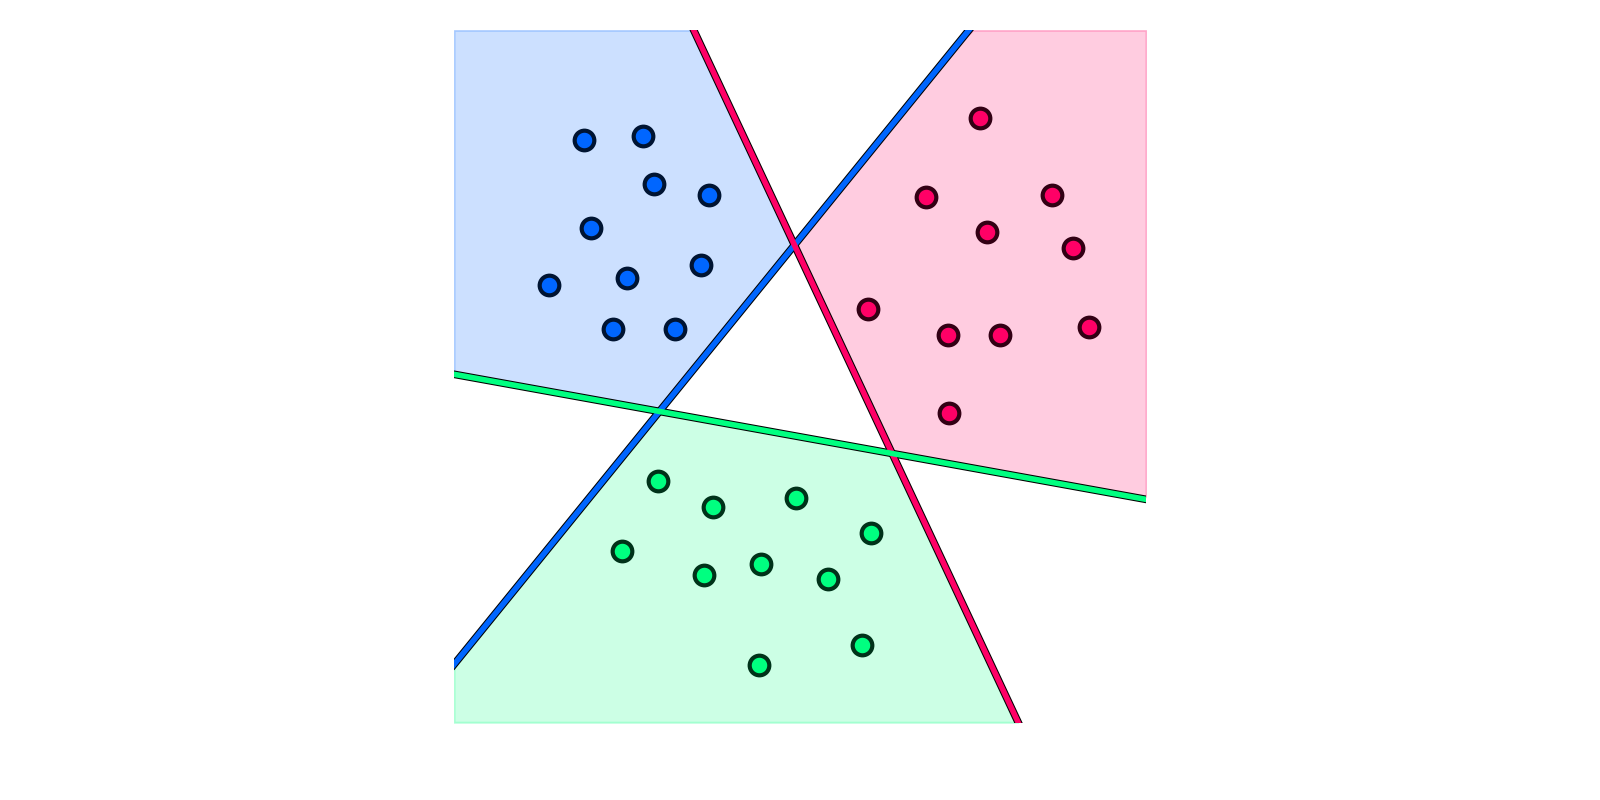

In [9]:
# This code cell will not be shown in the HTML version of this notebook
# color those points clearly belonging to each individual class - those lying near the points we already have on the positive side of only one classifier.
demo1.show_fusion(region = 1)

##  Points on the positive side of more than one classifier

Notice there are regions left uncolored above that do not fall into this first category (of being on the positive side of a single classifier). These include regions where points are on the positive side of more than one classifier - these are the three triangular white regions bordered by *two* decision boundaries. For example points in the white region at the top - bordered by the red and blue decision boundaries - are on the positive side of both the red and blue classifiers. The un-colored regions also include the one in the very middle of the plot whose points are on the negative side of all three classifiers.

Let us first determine how to appropriately classify points in those un-colored regions where more than one classifier is positive. We deal with the case where a point ends up on the negative side of all classifiers in the next Subsection. For simplicity, here we only consider the top region that is on the positive side of both the red and blue classifiers (the other regions should behave similarly). 

In the Python cell below we show two example points in this region. In each case we plot the original dataset and individual classifiers along with new point in question in black. We also highlight the distance from the new point to both decision boundaries in dashed black, with the projection of the point onto each decision boundary shown as an 'X' in the same color as its respective hyperplane.

<IPython.core.display.Javascript object>


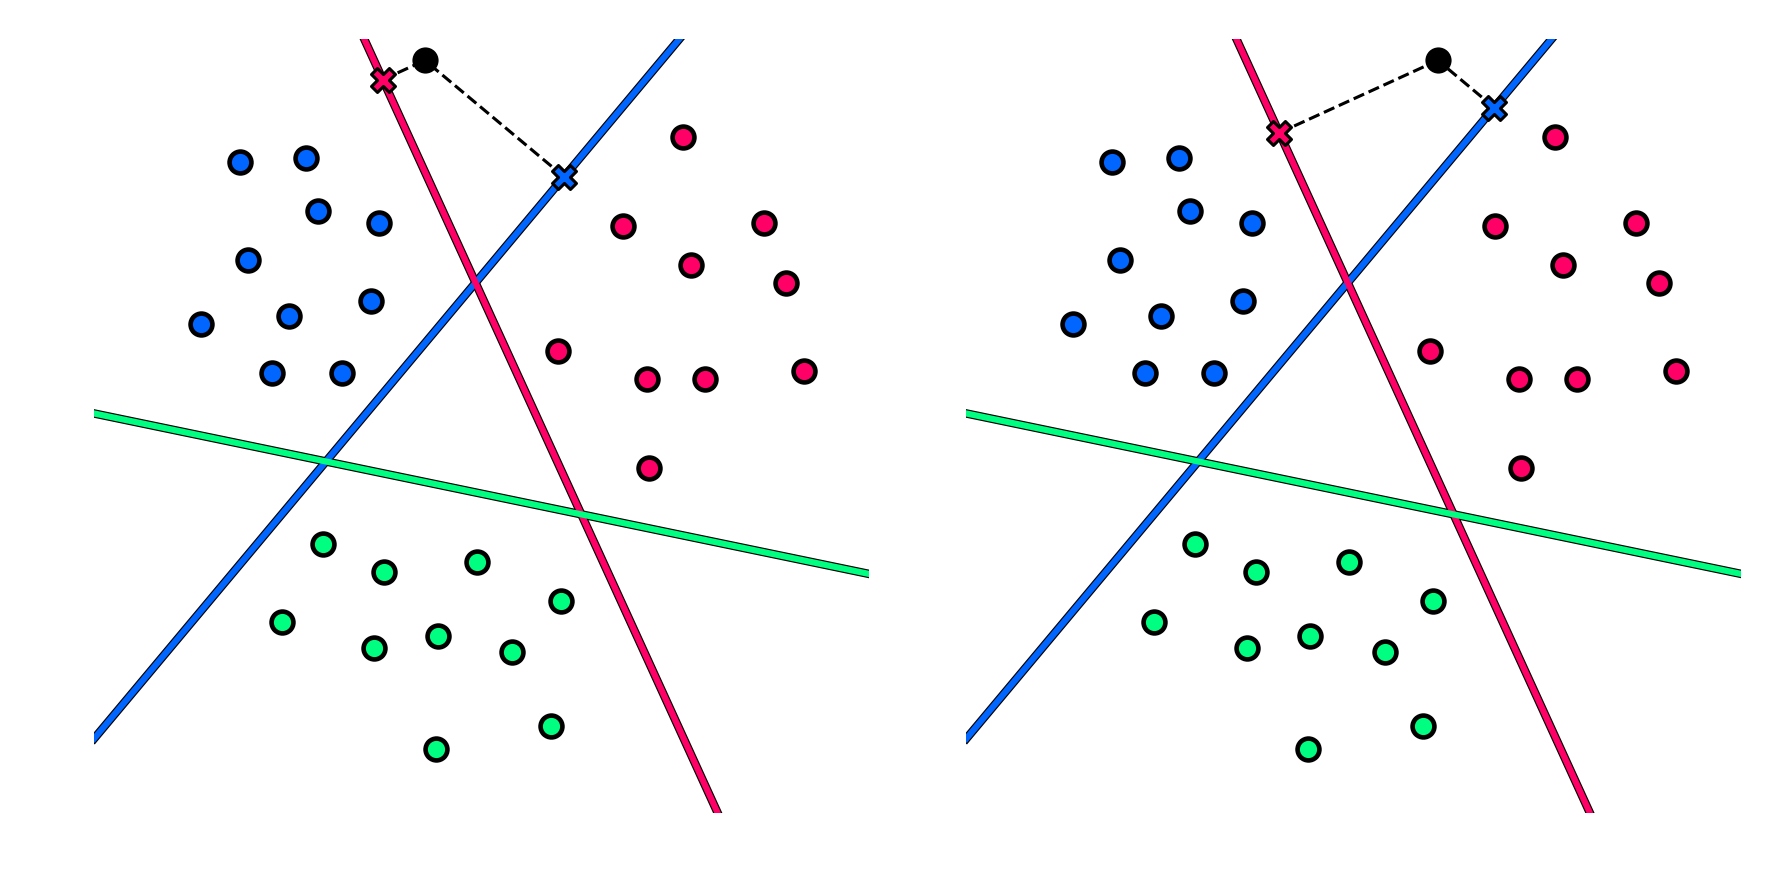

In [5]:
# This code cell will not be shown in the HTML version of this notebook
# try examining a point and its distance to relevant decision boundaries
demo1.point_and_projection(point1 = [0.4,1] ,point2 = [0.6,1])

Which class should we assign each point to?

- Hint: we can think of a classifier as being 'more confident' of the class identity of given a point, the *farther* the point lies from the classifier's decision boundary (these points are more resistant to perturbations).

With this in mind, which classifier can we say is more confident about this point?  The answer is the red one since our input point lies a greater distance from it. 

What about the point shown in the right panel? By the same logic it is best assigned to the blue class, being at a greater distance from the blue classifier.

If we repeat this logic for every point on the positive side of more than two classifiers ...

<IPython.core.display.Javascript object>


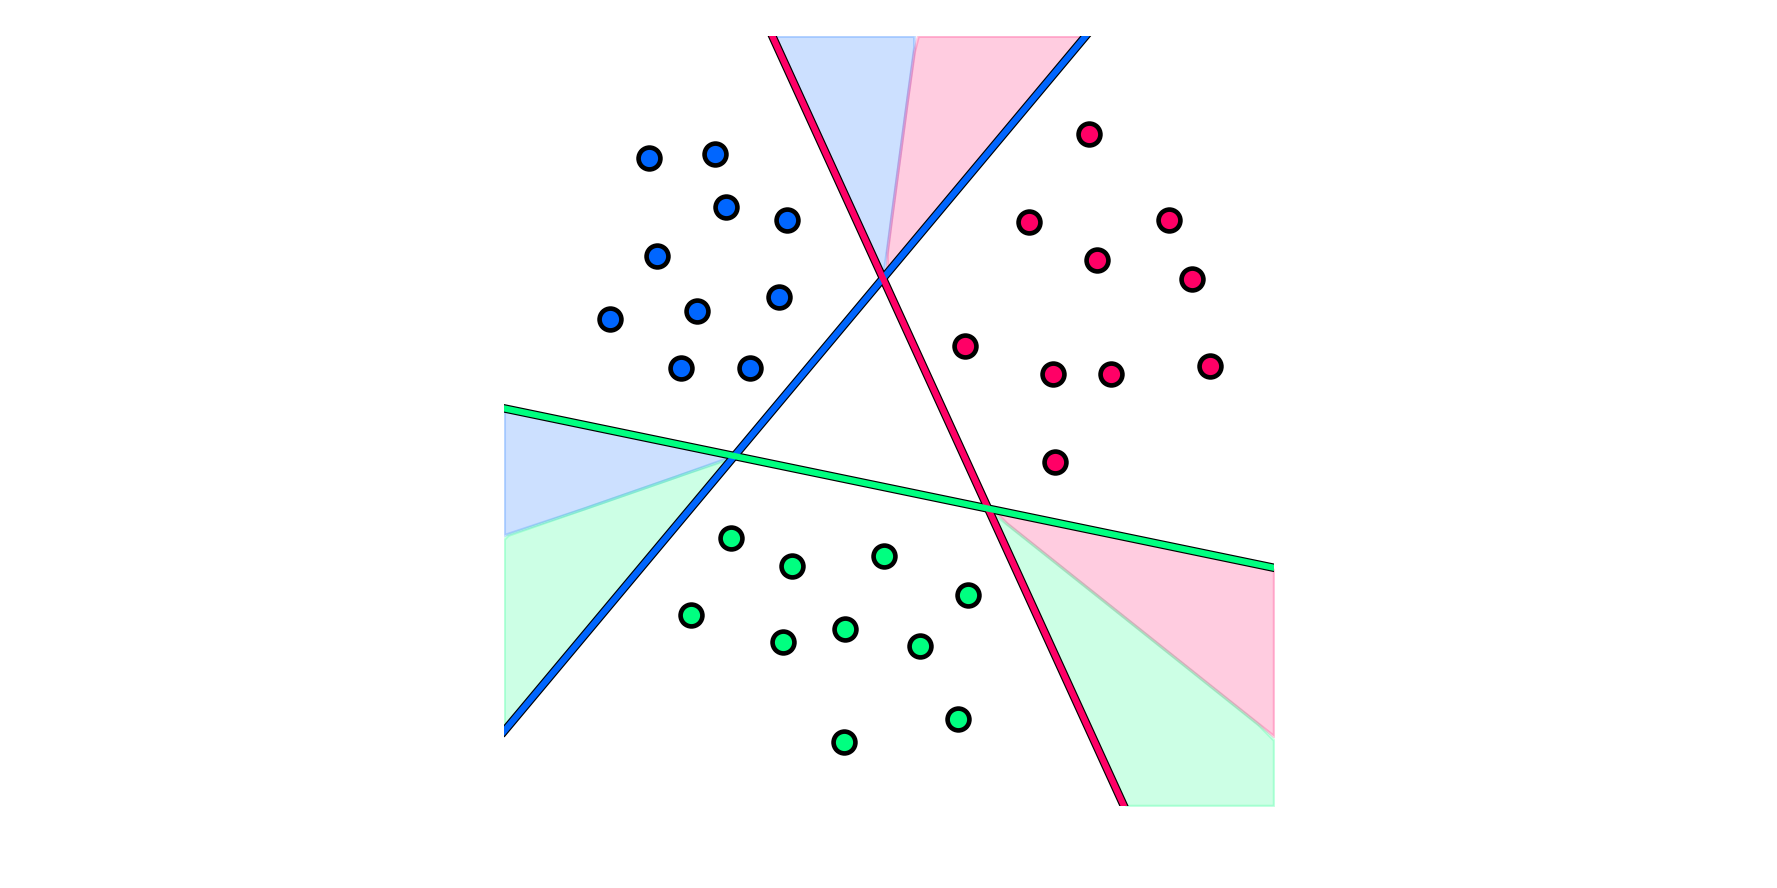

In [6]:
# This code cell will not be shown in the HTML version of this notebook
# color points belonging on the positive side of two or more classifiers
demo1.show_fusion(region = 2)

How about points equidistant to two or more decision boundaries? 

<IPython.core.display.Javascript object>


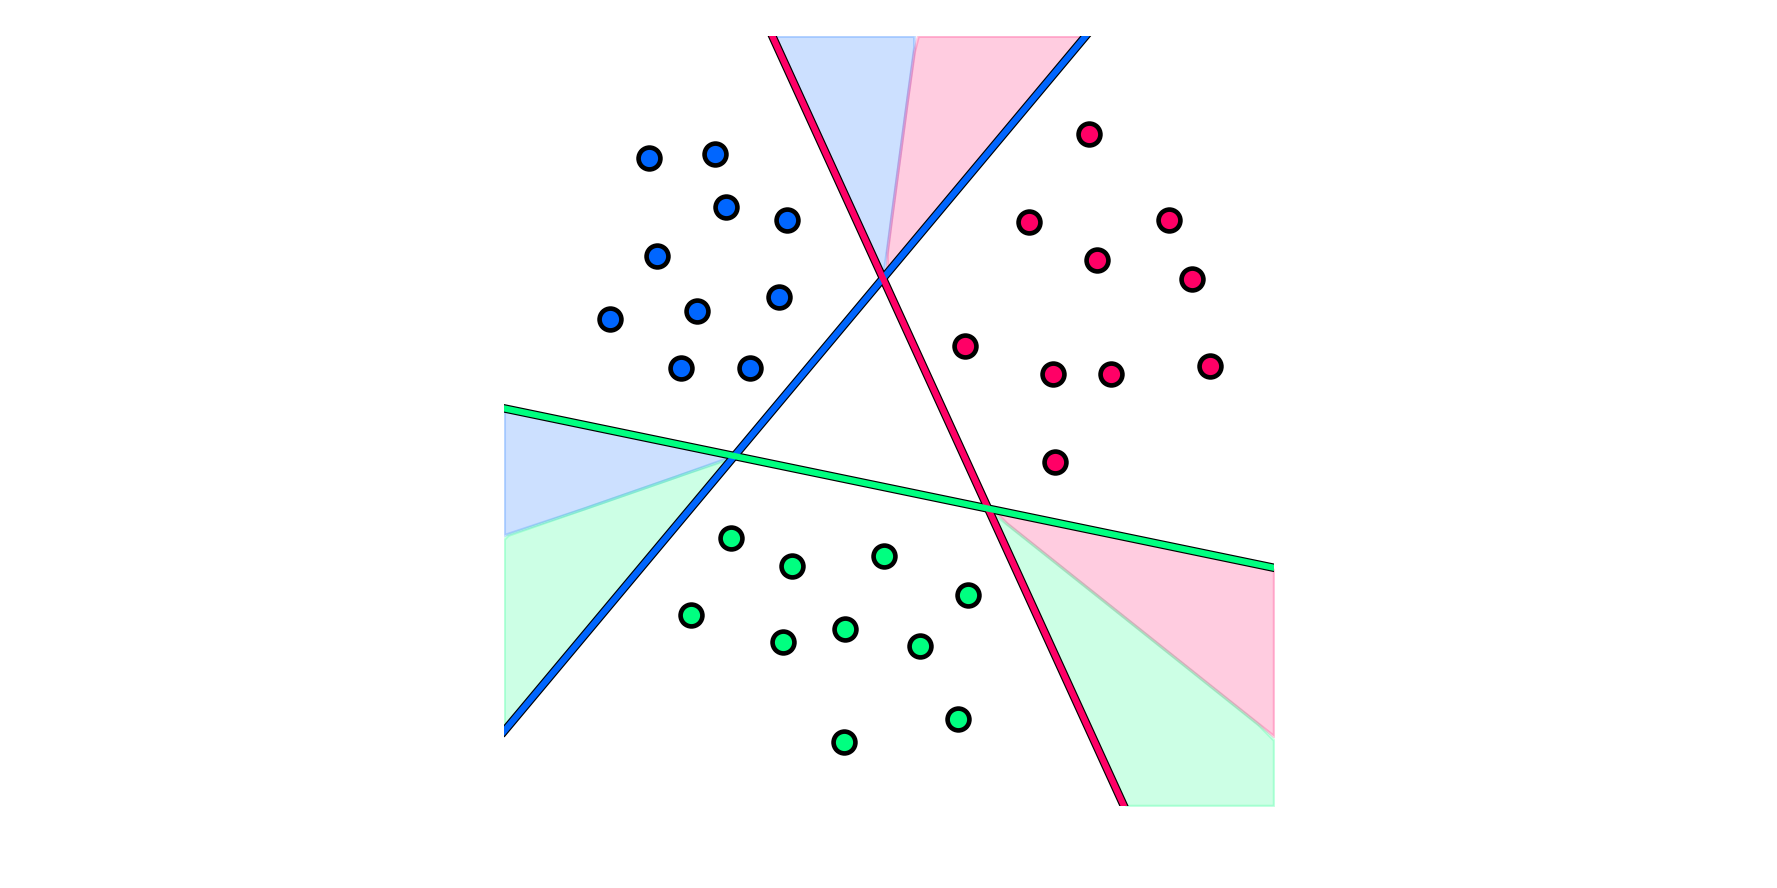

In [6]:
# This code cell will not be shown in the HTML version of this notebook
# color points belonging on the positive side of two or more classifiers
demo1.show_fusion(region = 2)

We assign a class label at random. These points form the **multi-class decision boundary**.

**Classification rule:** in these regions we have assigned each point to the class whose boundary is at the largest nonnegative distance from it. 

How do we compute the distance of an arbitrary point to each of our decision boundaries?

As discussed in [Section 6.3](https://jermwatt.github.io/machine_learning_refined/notes/6_Linear_twoclass_classification/6_3_Softmax.html), the *signed distance* of an arbitrary point $\mathbf{x}$ to the $j^{th}$ linear decision boundary is equal to the evaluation at this boundary *provided we normalize its parameters by the magnitude of its feature-touching weights* 

\begin{equation}
\text{signed distance of $\mathbf{x}$ to $j^{th}$ boundary} =  \frac{\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_j }{\left\Vert \boldsymbol{\omega}_{j}^{\,} \right\Vert_2}
\end{equation}

If we *normalize* the weights of each linear classifier by the length of its normal vector as

\begin{equation}
\mathbf{w}_{j}^{\,} \longleftarrow \frac{\mathbf{w}_{j}^{\,}}{\left\Vert \boldsymbol{\omega}_{j}^{\,} \right\Vert_2}
\end{equation}

then this distance is simply written as the raw evaluation of the point via the decision boundary as

\begin{equation}
\text{signed distance of $\mathbf{x}$ to $j^{th}$ boundary} =  \mathring{\mathbf{x}}_{\,}^T \mathbf{w}_j
\end{equation}

Therefore again - after weight-normalization - we have precisely the same prediction rule we found originally for regions of the space where only a single classifier is positive

\begin{equation}
y =  \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c.
\end{equation}

## Points on the negative side of all classifiers

Finally, what about the middle blank region of our dataset - where all of our classifiers are negative?  How shall we assign class labels to these points.  Once again let us examine two points in this region and reason out what should be done.

<IPython.core.display.Javascript object>


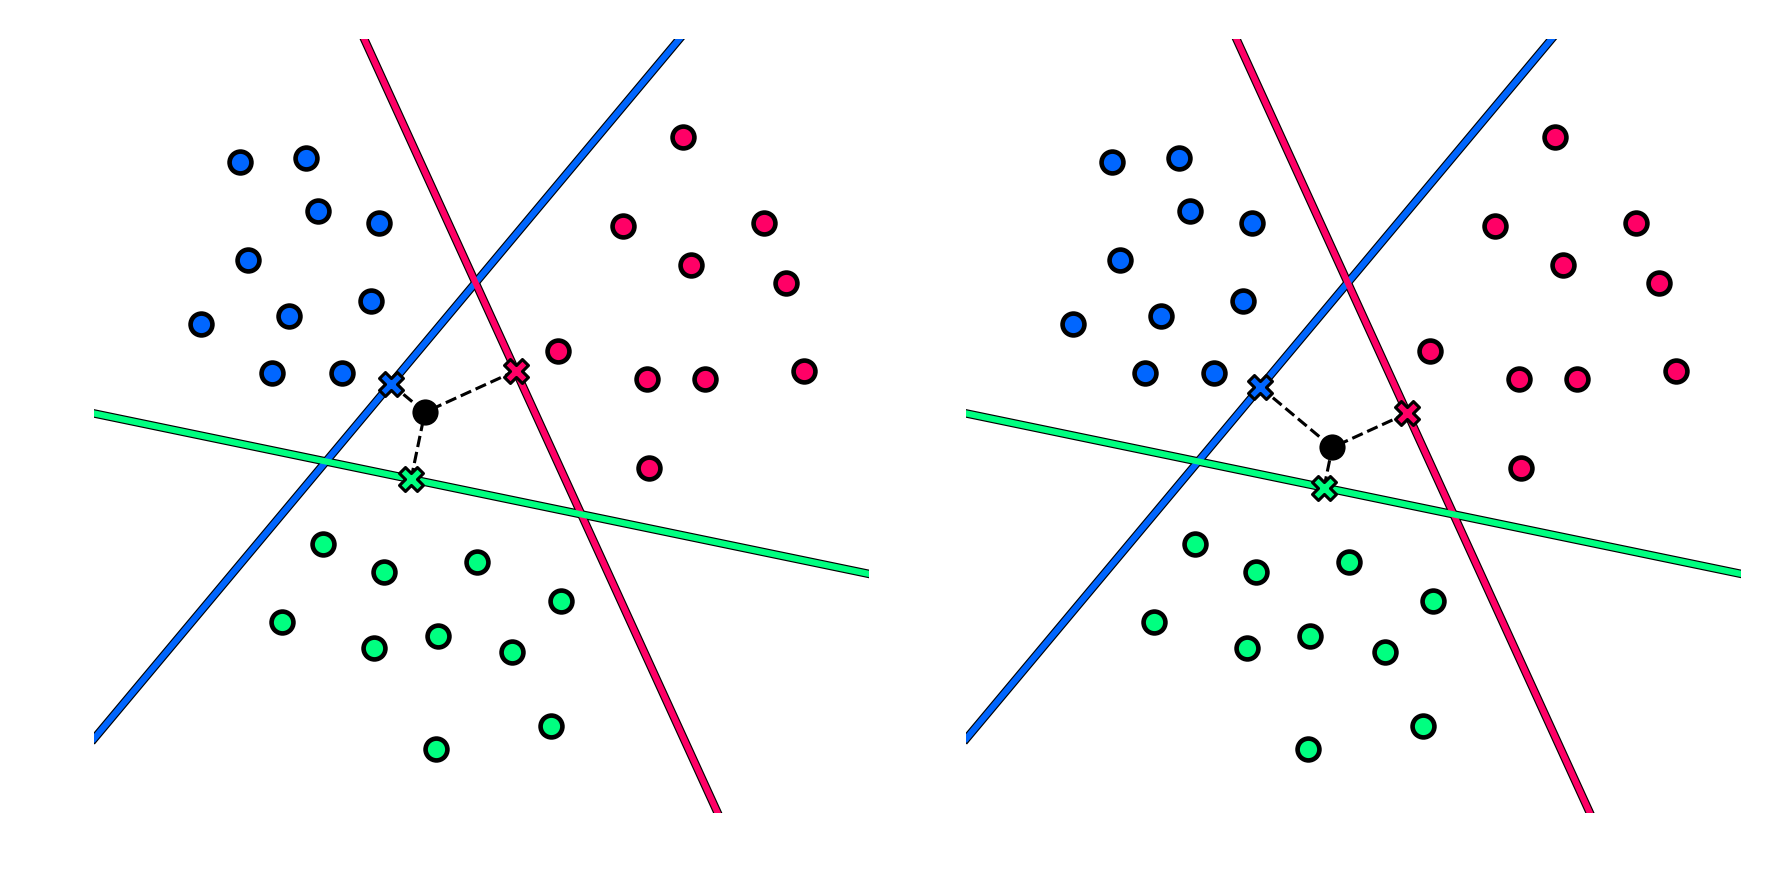

In [7]:
# This code cell will not be shown in the HTML version of this notebook
# try examining a point and its distance to relevant decision boundaries
demo1.point_and_projection(point1 = [0.4,0.5] ,point2 = [0.45,0.45])

Lets start with the point on the left. This point, like all those in the middle region, are on the negative side of all our classifiers. In other words, when trained, each of our $C$ two-class classifiers designated these points as *not* in their respective class. Thus we cannot argue - as we did at points on the positive side of multiple classifiers - that one classifier is more 'confident' in the class identity of such points. So what about the opposite question, i.e., which classifier is the least 'unsure' about the class identity of this point?  Which class is the point the least dissimilar spatially given our decision boundaries?  *Not* the boundary it is furthest from as was the case previously, but the one it is *closest* to. In the case of our example point on the left it lies closest to the red decision boundary - it is closest to being a red class point - hence we assign it to the red class.  

In this case we cannot argue that one classifier is more 'confident' in the class identity of such points. However, we can ask which classifier is the least 'unsure' about the class identity of such points? 

By the same reason our point on the right - which lies closest to the green decision boundary - is assigned to the green class. 

If we repeat this logic for every point in the region ...

<IPython.core.display.Javascript object>


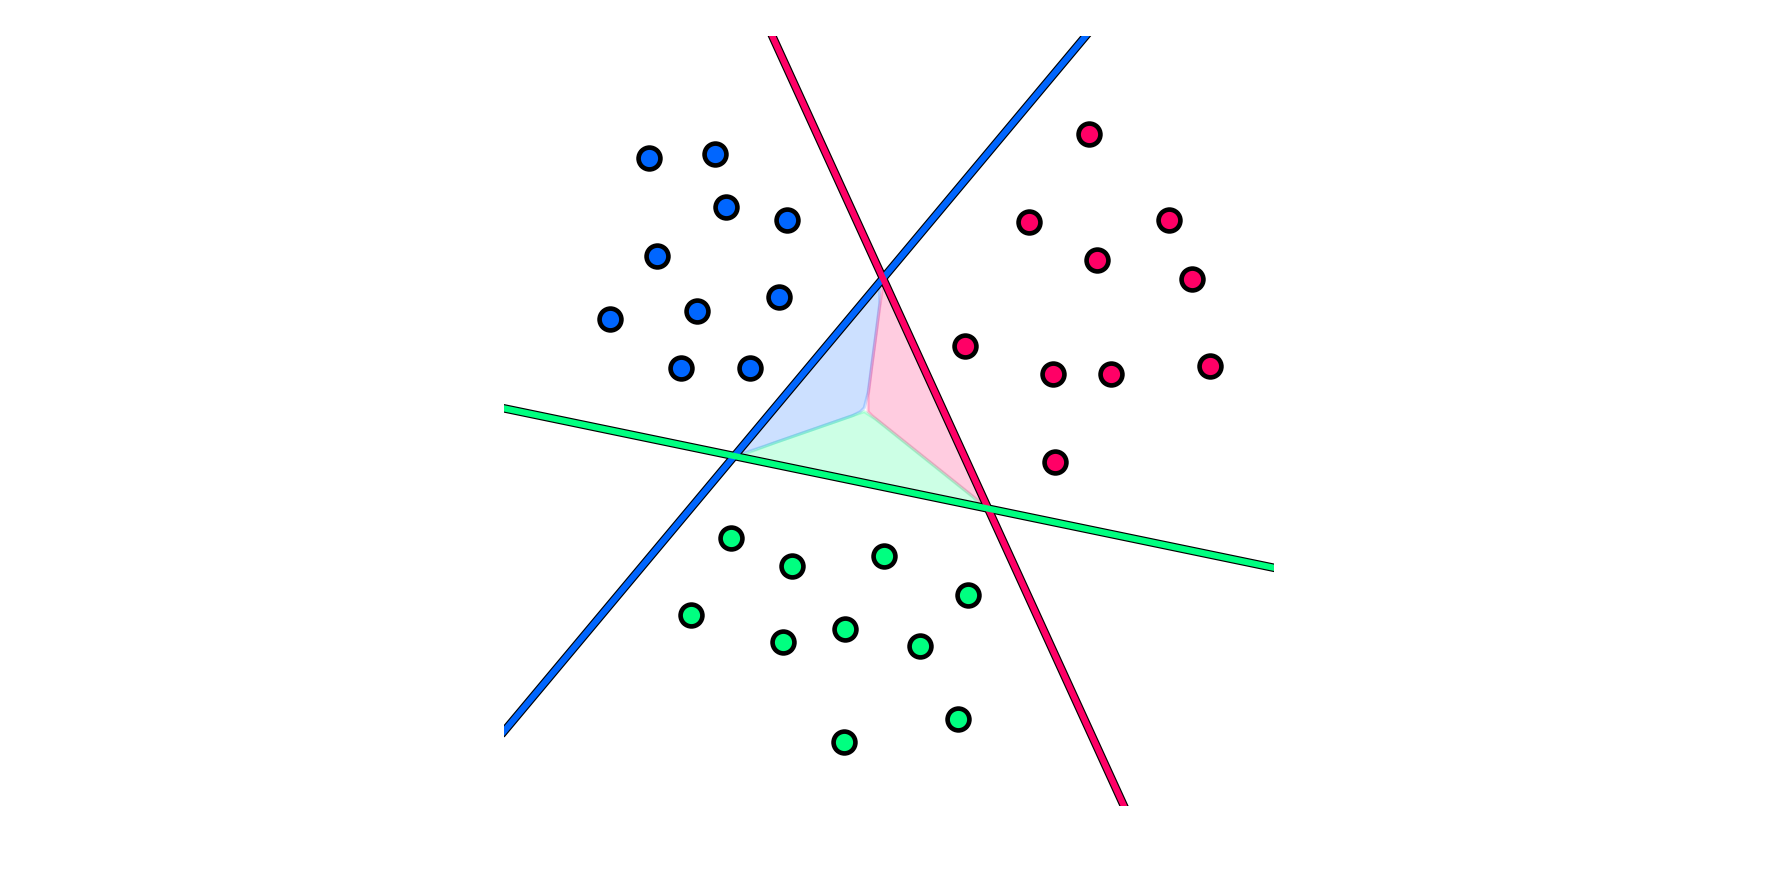

In [8]:
# This code cell will not be shown in the HTML version of this notebook
# color the region on which all classifiers are negative
demo1.show_fusion(region = 3);

As in the previous case, those points equidistant to two or more decision boundaries form the multi-class boundary and are assigned to a relevant class at random.

**Classification rule:** we assign a point to the class whose boundary is at the largest signed distance from it. 

Expressed algebraically, once again we have 

\begin{equation}
y =  \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c.
\end{equation}

## Putting it all together

We have now deduced that the single rule for assigning a label $y$ to a point $\mathbf{x}$ 

\begin{equation}
y =  \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c.
\end{equation}

which assigns the label based on the maximum signed distance of this point to each classifier, applies to the entire space of our problem (and - in general - to any multi-class problem). In fact this rule not only applies to the toy $C = 3$  dataset we have used in deriving the rule here, but to all multi-class datasets. Indeed we could have used any dataset (even those that are not completely separable) in our derivations here, as any multi-class problem can be broken down into the three fundamental regions we have seen in these derivations: regions where points are on the positive side of a single classifier, more than one classifier, or are on the negative side of all classifiers.

We call this the *fusion rule* - since it tells us precisely how to fuse our $C$ individual classifiers together to make a unified and consistent classification across the entire space of any dataset. It is the core of the *One-versus-All* algorithm, which we now state formally.

We have now deduced that the single rule for assigning a label $y$ to a point $\mathbf{x}$ 

\begin{equation}
y =  \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c.
\end{equation}

which assigns the label based on the maximum signed distance of this point to each classifier, applies to the entire space of our problem. 

We call this the **fusion rule** since it tells us precisely how to fuse our $C$ individual classifiers together to make a unified and consistent classification across the entire space of any dataset.

<img src= '../../mlrefined_images/superlearn_images/ova_psuedocode.png' width="85%" alt=""/>

### One-versus-All  multi-class classification

<hr style="height:1px;border:none;color:#555;background-color:#555;">
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; <strong>Input:</strong> multiclass dataset $\left\{ \left(\mathbf{x}_{p,}\,y_{p}\right)\right\} _{p=1}^{P}$ where $y_{p}\in\left\{ 0,...,C-1\right\}$, two-class classification scheme and optimizer <br>
<strong>2:</strong>&nbsp;&nbsp; <code>for</code> $\,\,j \, = \, 0,...,C-1$<br>
<strong>3:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; form temporary labels $\tilde y_p = \begin{cases}   +1 \,\,\,\,\,\,\text{if}\,\, y_p = j \\ -1 \,\,\,\,\,\,\text{if}\,\, y_p \neq j    \end{cases}$ <br>
<strong>4:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; solve two-class subproblem on $\left\{ \left(\mathbf{x}_{p,}\,\tilde y_{p}\right)\right\} _{p=1}^{P}$ to find weights $\mathbf{w}_j$
<br>
<strong>5:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; normalize classifier weights by magnitude of feature-touching portion $\mathbf{w}_{j}^{\,} \longleftarrow \frac{\mathbf{w}_{j}^{\,} }{\left\Vert \boldsymbol{\omega}_{j}^{\,} \right\Vert_2}$ 
<br>
<strong>6:</strong>&nbsp;&nbsp; <code>end for</code> <br>
<strong>7:</strong>&nbsp;&nbsp; To assign label $y$ to a point $\mathbf{x}$, apply the fusion rule: $y =  \underset{c\,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{\,}^T \mathbf{w}_c$<br>
<hr style="height:1px;border:none;color:#555;background-color:#555;">
</p>

**Note:** In practice it is common to see implementations that skip the normalization in step 5. This can theoretically lead to poor classification due to different sized normal vectors creating out of scale distance-to-classifier measurements. However because often each classifier is trained using the same optimization framework (e.g., the same sized initialization and optimization algorithm) the resulting size of each trained normal vector can end up being around the same size (hence reducing the need for normalization).

### Multiclass decision boundary

Having addressed every region in the space of our exemplar dataset, one might wonder what the entire space looks like after learning the decision boundary. We plot this in the next Python cell. In both the left and right panels below we correctly classify and color the entire space as described above. In the left panel we show the three original two-class linear decision boundaries, and on the right we show the multi-class decision boundary (in black) created by fusing these individual boundaries using the fusion rule. This black multi-class boundary arises at points where the fusion rule does not provide a unique solution - i.e., at points where two or more classifiers provide the maximum evaluation.

The boundary resulting from the fusion rule is always piecewise-linear as with our example shown here. While the fusion rule explicitly defines this boundary it does not provide us with a closed form formula for it as with e.g., logistic regression (although one may work out a somewhat convoluted formula describing the boundary in general). In fact the piecewise-linear boundaries shown in the figures of this Section were drawn not by determining their formula but by labeling (and appropriately coloring) every point using the fusion rule.

<IPython.core.display.Javascript object>


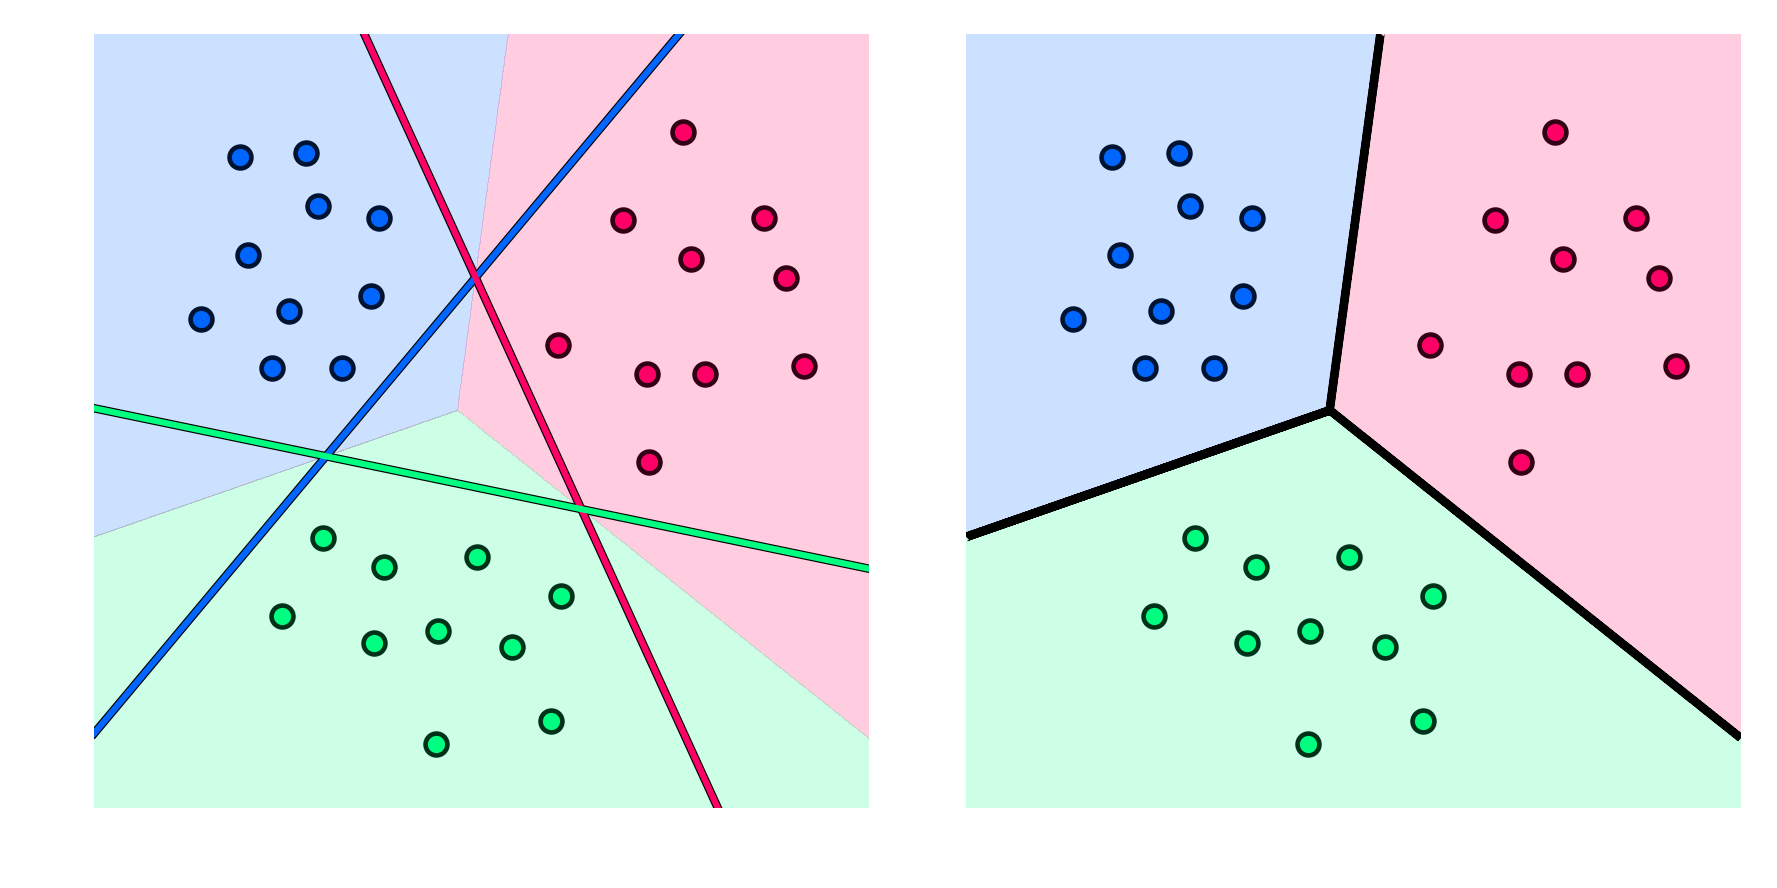

In [9]:
# This code cell will not be shown in the HTML version of this notebook
# classify and color the entire space using our individual classifiers and the fusion rule
demo1.show_complete_coloring();

- The multi-class boundary (in black) arises at points where the fusion rule does not provide a unique solution


- The boundary resulting from the fusion rule is always piecewise-linear.


- While the fusion rule explicitly defines this boundary it does not provide us with a closed form formula for it as with e.g., logistic regression.

##  Implementing a One-versus-All classifier in `Python`

To take advantage of the `numpy` libraries fast array operations we use the notation first introduced in [Section 5.6](https://jermwatt.github.io/machine_learning_refined/notes/5_Linear_regression/5_6_Multi.html), we stack the trained weights from our $C$ classifiers together into a single $\left(N + 1\right) \times C$ array of the form

\begin{equation}
\mathbf{W}=\begin{bmatrix} 
w_{0,0}  &  w_{0,1}  &  w_{0,2}  & \cdots   &  w_{0,C-1}  \\
w_{1,0}  &  w_{1,1}  &  w_{1,2}  & \cdots  &   w_{1,C-1}  \\
w_{2,0}  &  w_{2,1}  &  w_{2,2}  & \cdots  &  w_{2,C-1}  \\
\,\,\, {\vdots}_{\,\,\,}  & {\vdots}_{\,\,\,}  &  {\vdots}_{\,\,\,}  &  \cdots   &    {\vdots}_{\,\,\,}    \\
w_{N,0}  &  w_{N,1} & w_{N,2}  &  \cdots  &  w_{N,C-1}  \\
\end{bmatrix}
\end{equation}

We also extend our `model` notation to denote the evaluation of our $C$ individual linear models as


\begin{equation}
\begin{matrix} 
\text{model}\left(\mathbf{x},\mathbf{W}\right) = \mathring{\mathbf{x}}_{\,}^T\mathbf{W} \end{matrix}  = \begin{bmatrix}
\mathring{\mathbf{x}}_{\,}^T  \overset{\,}{\mathbf{w}}_{0}^{\,}   &
\mathring{\mathbf{x}}_{\,}^T  \overset{\,}{\mathbf{w}}_{1}^{\,}   &
\cdots \, &
\mathring{\mathbf{x}}_{\,}^T  \overset{\,}{\mathbf{w}}_{C-1}^{\,}
\end{bmatrix}
\end{equation}

Note how this is precisely the same linear model used with multi-output regression as we saw in [Section 5.6](https://jermwatt.github.io/machine_learning_refined/notes/5_Linear_regression/5_6_Multi.html).  We can therefore re-use the implementation given there, which we repeat below.

Notice that we can now write the fusion rule in this extended `model` notation equivalently as 

\begin{equation}
y = \underset{c \,=\, 0,...,C-1} {\text{max}}\,\text{model}\left(\mathbf{x},\mathbf{W}\right).
\end{equation}

#### <span style="color:#a50e3e;">Example. </span> Classifying a dataset with $C = 4$ classes using OvA

In this example we quickly apply the OvA algorithm derived above to a toy dataset with $C=4$ classes shown below.

<IPython.core.display.Javascript object>


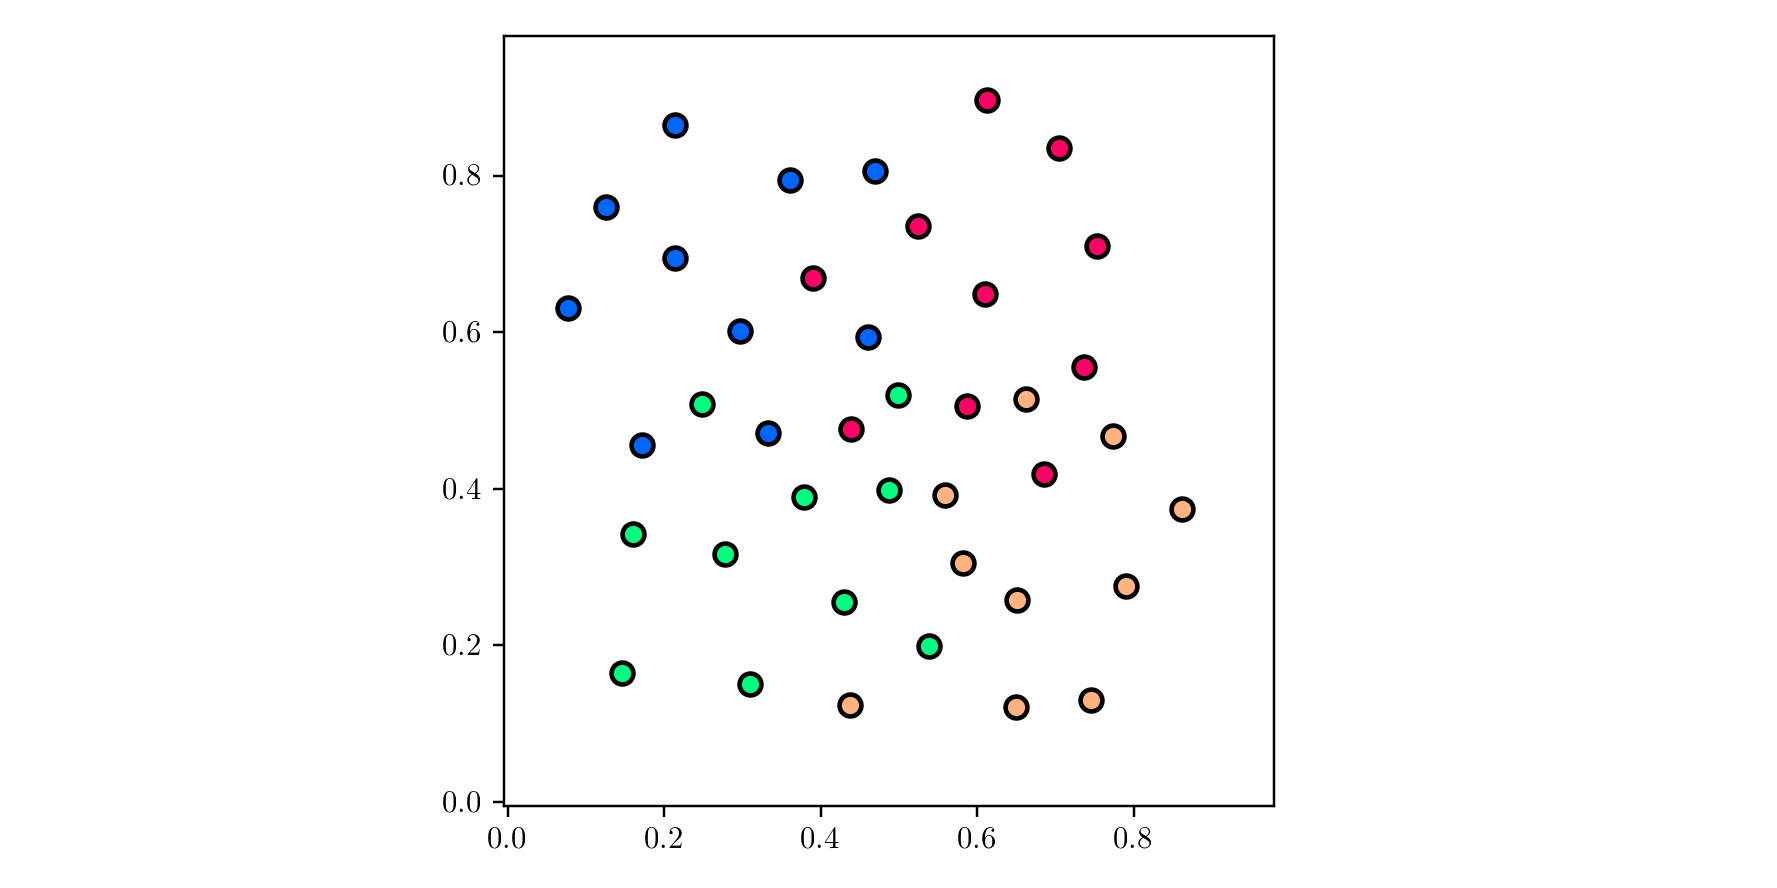

In [12]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
data3 = np.loadtxt(datapath + '4class_data.csv',delimiter = ',');

# create an instance of the ova demo
demo3 = superlearn.ova_illustrator.Visualizer(data3);

# visualize dataset
demo3.show_dataset();

With our subproblems solved we can use the fusion rule to classify our entire input space.  The Python cell below shows this printing out two panels with all points in the space colored according to the fusion rule in each panel.  The left panel also shows the individual learned two-class classifiers, while the right panel shows the final multi-class decision boundary, which does a fine job of distinguishing the four classes.

<IPython.core.display.Javascript object>


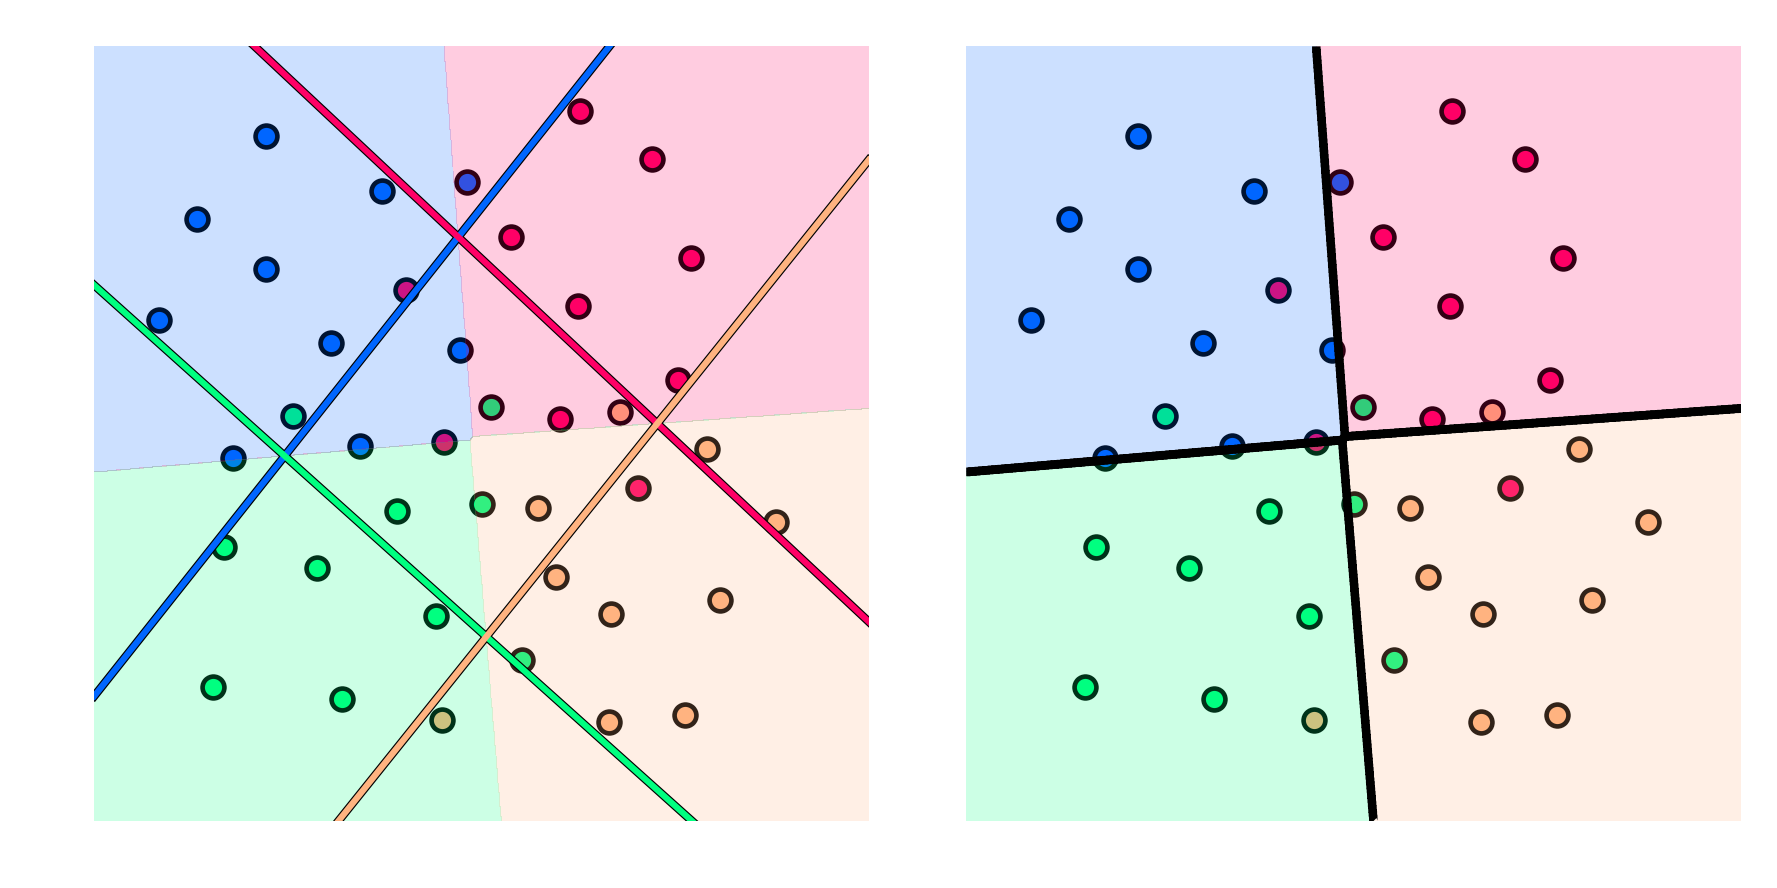

In [13]:
# This code cell will not be shown in the HTML version of this notebook
# solve the 2-class subproblems
demo3.solve_2class_subproblems()

# classify and color the entire space using our individual classifiers and the fusion rule
demo3.show_complete_coloring()

Note with this dataset that each class is *not* linearly separable from the remainder of the data. This is no matter - the OvA framework still produces an appropriate multi-class boundary.

##  Interpreting the fusion rule as a discrete step function

In deriving the fusion rule above viewed the problem of multi-class classification 'from above', meaning (as detailed in e.g., [Section 6.2](https://jermwatt.github.io/machine_learning_refined/notes/6_Linear_twoclass_classification/6_2_Cross_entropy.html)) that we viewed our data in the input feature space coloring the value of each label instead of plotting our output as a dimension of the data.  However if we view our multi-class data 'from the side' we can indeed view the fusion rule as a *discrete step function for multi-class data*.  Further when using label values $y_p \in \left\{0,1,...,C-1\right\}$ this discrete step function takes on the same values.

We an visualize this discrete step function for the primary dataset employed in this Section by evaluating the fusion rule over a fine set of input values using the range of the data and visualizing the result.  Instead of visualizing these points 'from above' as we have been doing, and coloring them to denote class ownership, we can plot the result as a *surface* to visualze the fusion rule as a discrete step.  We show this below - in the left panel is our view of the data and fusion rule 'from above', and in the right panel is the same setup shown 'from the side' with the fusion rule displayed as a discrete step function.  Note that the jagged edges on some of the steps in the right panel are merely an artifact of the plotting mechanism (Python's matplotlib library) used to generate the three dimensional plot.  In reality the edges of each step are smooth like the fused decision boundary shown in the input space.

<IPython.core.display.Javascript object>


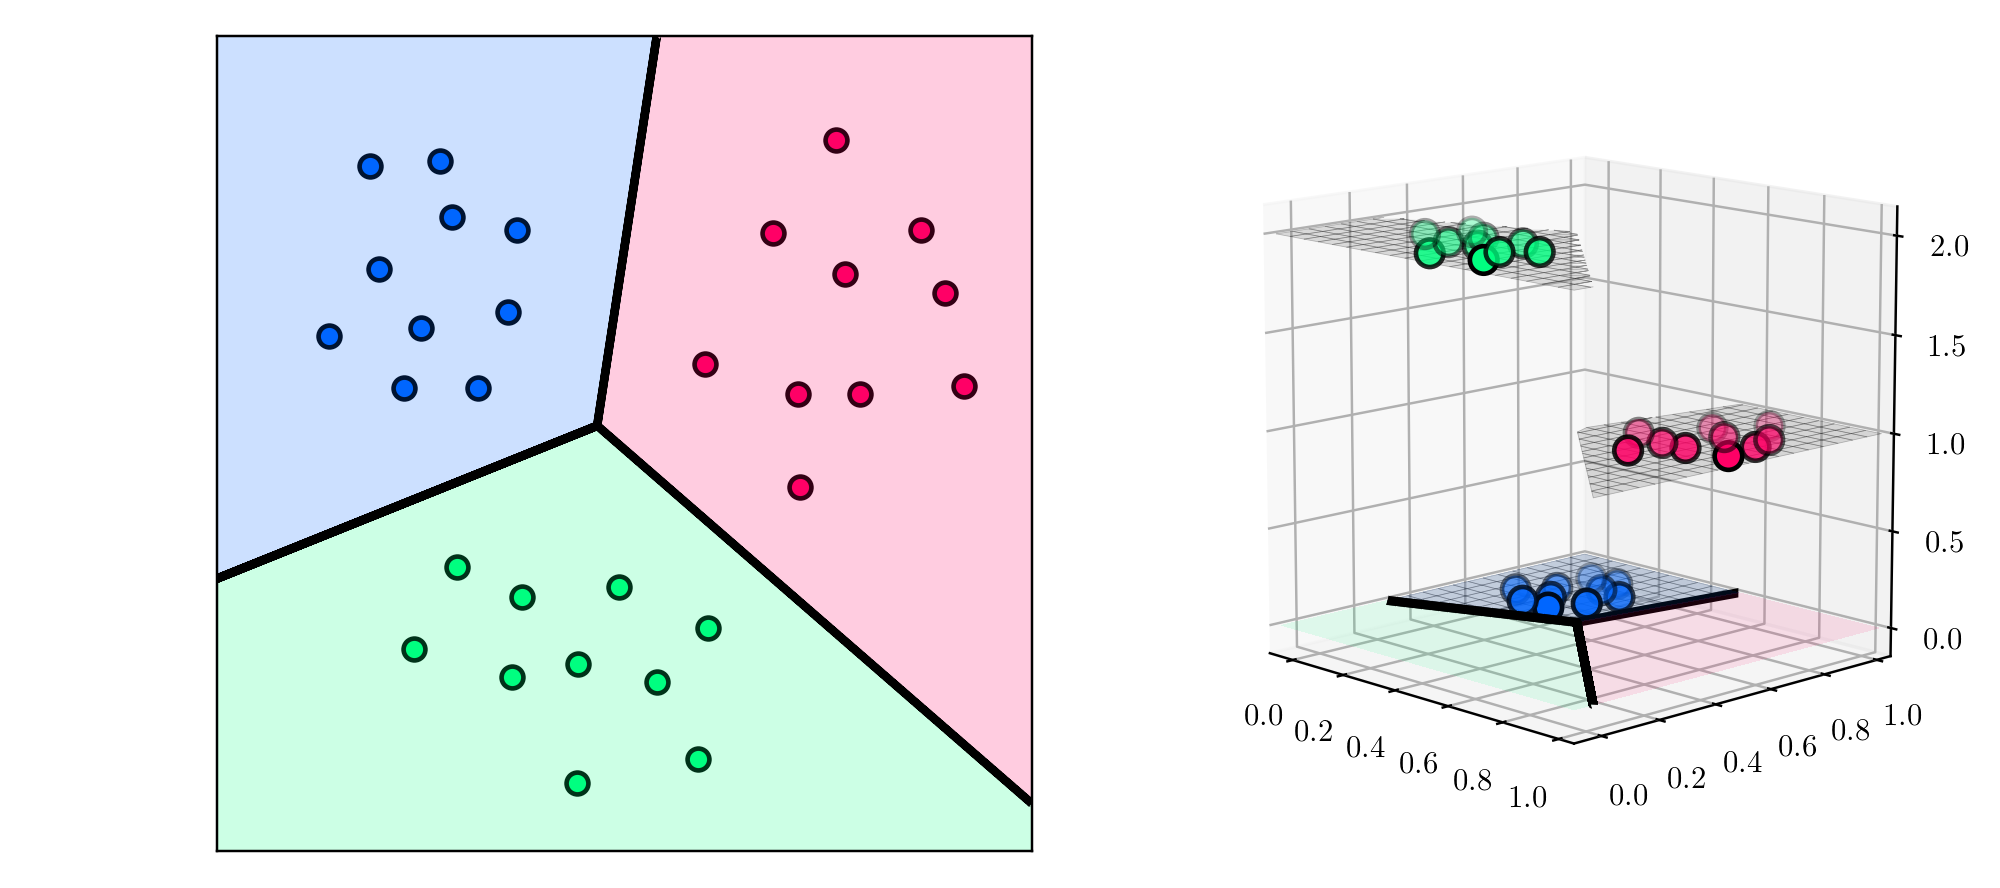

In [14]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
data = np.loadtxt(datapath + '3class_data.csv',delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

# create an instance of the ova demo
demo = superlearn.multiclass_illustrator.Visualizer(data)

# load in OvA framework
ova = superlearn.one_versus_all

# run OvA on dataset
w = 0.1*np.random.randn(3,1); max_its = 10; optimizer = 'newtons_method'; epsilon = 10**(-7)
weight_history, count_history = ova.train(x,y,max_its = max_its,optimizer = optimizer,w = w,epsilon = epsilon)

# plot classification of space, individual learned classifiers (left panel) and joint boundary (middle panel), and cost-function panel in the right panel
demo.show_discrete_step(weight_history,view = [12,-44])